### Student Information
Name:莊之愷

Student ID:112033579

GitHub ID: alanchuang0921

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [220]:
### Begin Assignment Here

## 1.Firstpart


Create dataframe for 20 newsgroup dataset

In [221]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
# Custom helper function
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline
# Only categories in 20 newsgroup dataset we will load 
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# Load dataset into dict of lists
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
# Construct dataframe from a list
# Note: format_rows only return list of formatted data (article)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# Add category to the dataframe
X['category'] = twenty_train.target

# Add category label also
# Note: retrun list of target_names
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>Exercise 2 (take home)
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [222]:
# Selecting rows using boolean filtering conditions
print(X[X['category'] == 3])
print(X[X['category'] <= 2])



                                                   text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2229  From: jcj@tellabs.com (jcj) Subject: Re: proof...         3   
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religi

In [223]:
# Selecting a subset of specific rows and columns
X.loc[5:10, ['text', 'category']]

,text,category
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3


In [224]:
# Filtering rows using the isin() function
X[X['category'].isin([1, 2])]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### >>Exercise 5 (take home)
Please check the data and the process below, describe what you observe and why it happened. 𝐻𝑖𝑛𝑡: why .isnull() didn't work?

In [225]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]
# Convert to dataframe
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [226]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Because Pandas' .isnull() method considers only NaN as the standard representation of missing values and does not treat other forms like 'NaN' (as a string) and 'None' (as a string) as missing values. Only np.nan and None are regarded as missing values, while other representations are interpreted as actual data.

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [227]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [228]:
X_sample = X.sample(n=1000,random_state=41)
X_sample

,text,category,category_name
1226,From: aa888@freenet.carleton.ca (Mark Baker) S...,3,soc.religion.christian
388,zaphod.mps.ohio-state.edu!wupost!uunet!olivea...,0,alt.atheism
442,From: ns14@crux3.cit.cornell.edu (Nathan Otto ...,2,sci.med
868,From: stank@cbnewsl.cb.att.com (Stan Krieger) ...,0,alt.atheism
1605,From: renew@blade.stack.urc.tue.nl (Rene Walte...,1,comp.graphics
...,...,...,...
1075,From: mprc@troi.cc.rochester.edu (M. Price) Su...,3,soc.religion.christian
1608,From: francis@ircam.fr (Joseph Francis) Subjec...,2,sci.med
99,From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...,0,alt.atheism
633,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med


In [229]:
# Row counts of dataframe
print("row counts  X :", len(X))
print("row counts sample_X",len(X_sample))

row counts  X : 2257
row counts sample_X 1000


1. "n" represents the selection of 1000 samples.
2. "random_state" is a seed value used for generating random samples. If I rerun the same code without changing the data and use the same "random_state" value, it will produce the same random samples. 

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [230]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

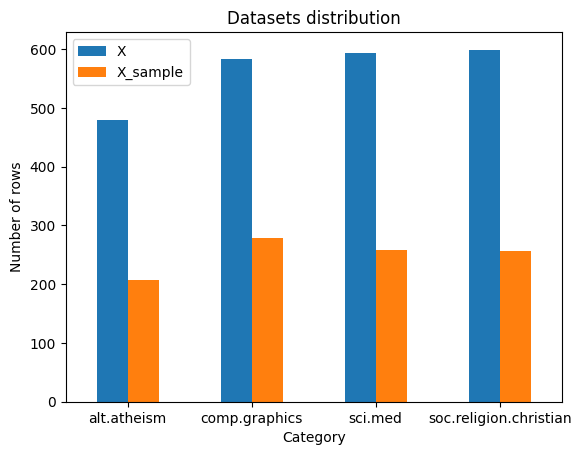

In [231]:
# Create dataframe based on each category numbers
df = pd.DataFrame({'X': X.category_name.value_counts(),
                   'X_sample': X_sample.category_name.value_counts()})
ax = df.plot.bar(rot=0)
ax.set_xlabel('Category')
ax.set_ylabel('Number of rows')
ax.set_title('Datasets distribution')
ax.legend()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [232]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh

# Change text to list of words
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
#learn the vocabulary and return document-term matrix
X_counts = count_vect.fit_transform(X.text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sw_ya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [233]:
X_counts[4, 0:100].toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [234]:
for i in range (100):
    if X_counts[4, i]==1:
        print(count_vect.get_feature_names_out()[i])

00
01


The another 1 in the fifth record is representing 01

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [235]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:40]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:40]]
plot_z = X_counts[0:40, 0:40].toarray() #X_counts[how many documents, how many terms]


,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,...,term_005148,term_00630,term_008561,term_0094,term_00am,term_00index,term_00pm,term_01,term_0100,term_010116
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


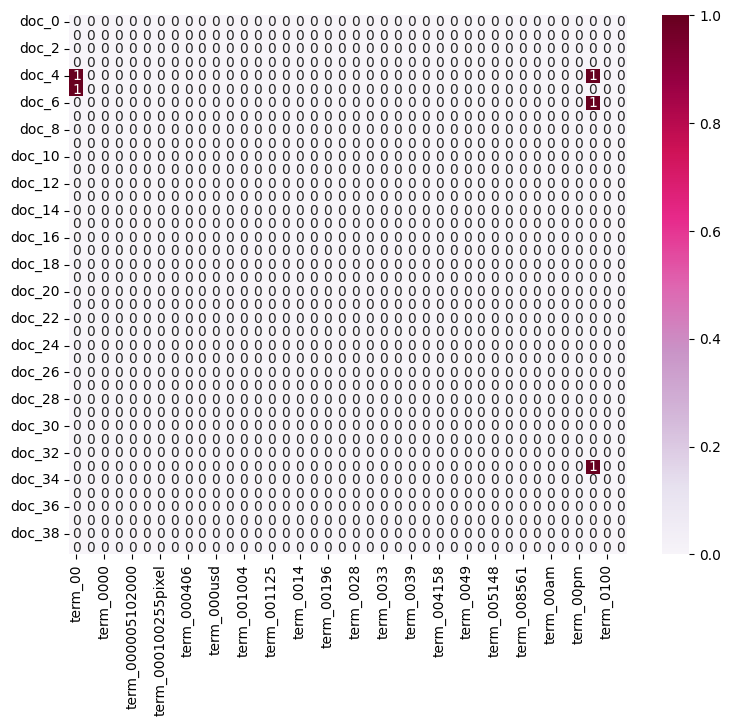

In [236]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

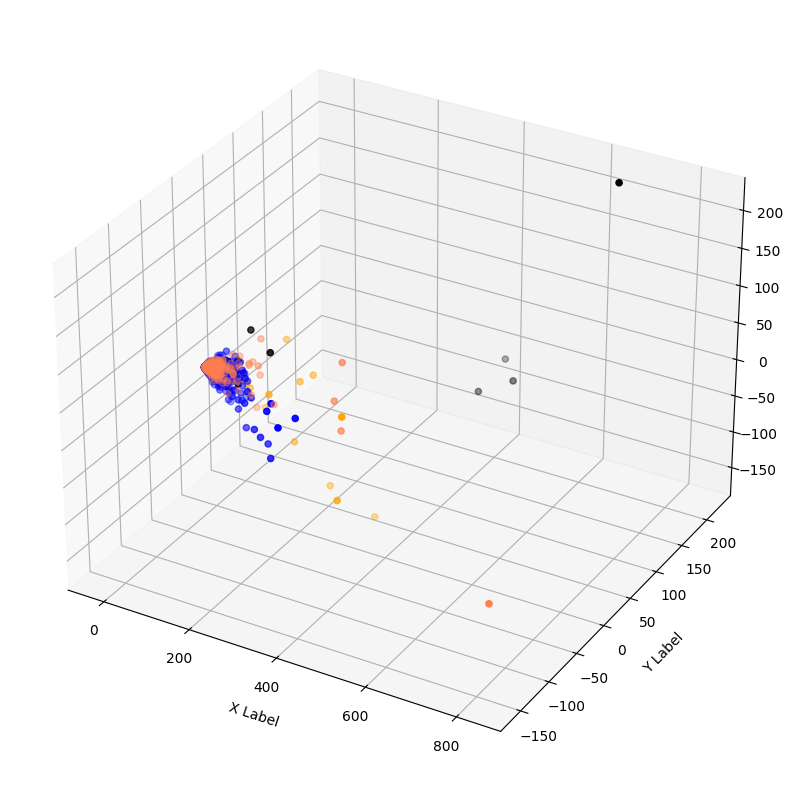

In [237]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')##

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


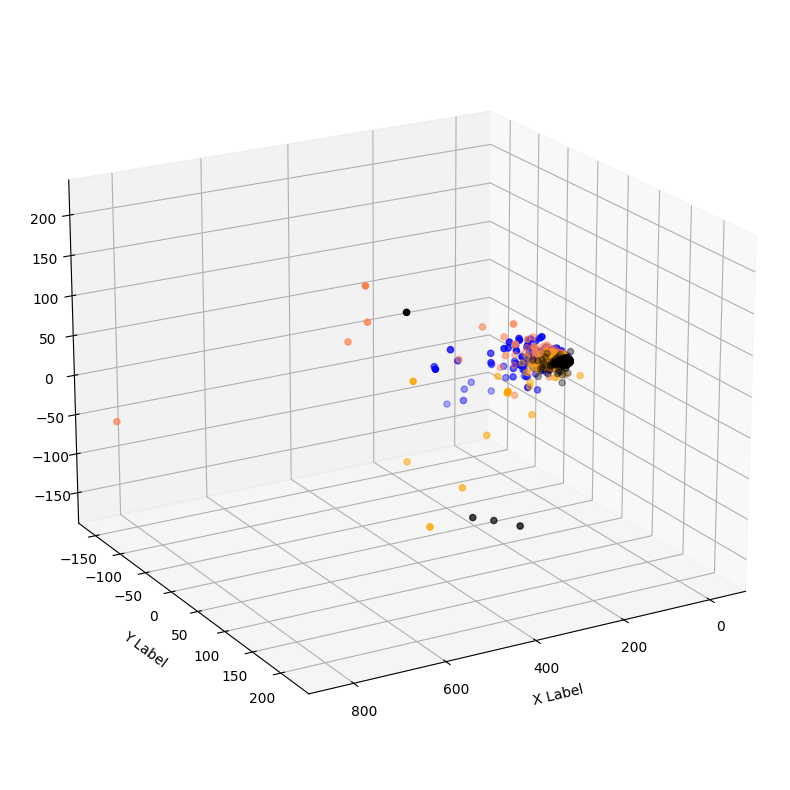

In [238]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')##

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(elev=20, azim=60)

plt.show()


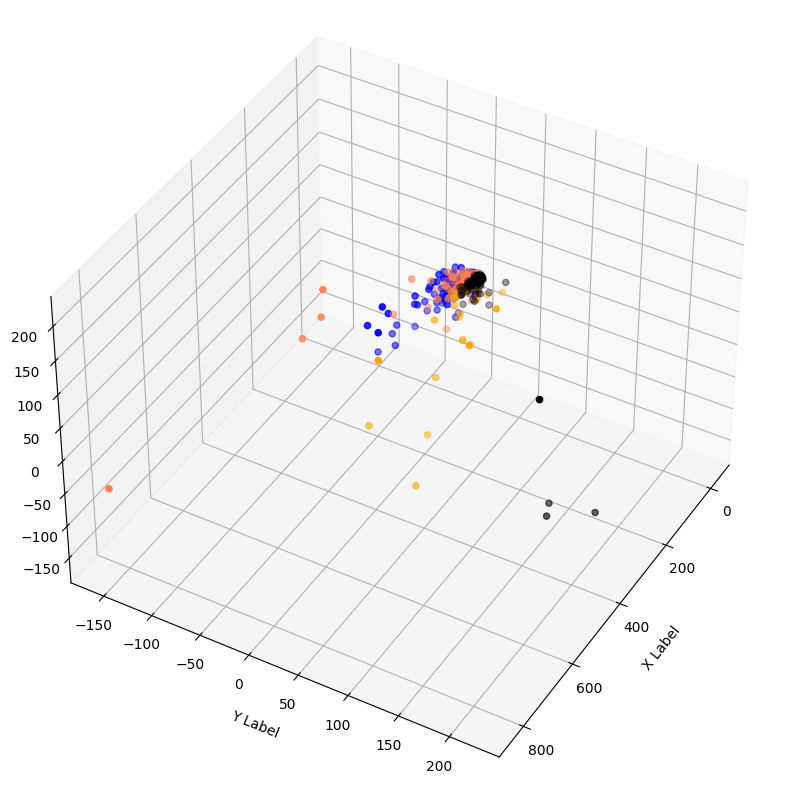

In [239]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')##

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(elev=40, azim=30)

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [240]:
import plotly.graph_objects as go

# I use this plot because it have grid lines and is clear
# I also configure plot size to make document terms large enough to see

# Get each term appear times of all documents
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y))
fig.update_layout(width=5000, height=1000)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [241]:
import plotly.graph_objects as go

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df = pd.DataFrame({"freq": term_frequencies, "name": count_vect.get_feature_names_out()})
print(df)
# Pop all words with frequency < 10, which efficiently reduce the number of terms you want to visualize
df_flitered = df[df["freq"] >= 10]
# Randomly get 300 samples to get more fair at showing data 
df_sample = df_flitered.sample(n=300)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_sample["name"], y=df_sample["freq"]))
fig.update_layout(width=5000, height=1000)
fig.show()

       freq          name
0       134            00
1        92           000
2         1          0000
3         2    0000001200
4         1  000005102000
...     ...           ...
35783     2         zyxel
35784     1            zz
35785     1           zzz
35786     1            ªl
35787     1      íålittin

[35788 rows x 2 columns]


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [242]:
import plotly.graph_objects as go

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df = pd.DataFrame({"freq": term_frequencies, "name": count_vect.get_feature_names_out()})
# Sort dataframe row by 'freq' feature in descending order
df_sorted = df.sort_values(by=['freq'], ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_sorted["name"][:300], y=df_sorted["freq"][:300]))
fig.update_layout(width=5000, height=1000)
fig.show()

## 2.Second part


### 2. Data Preparation &  3. Data Transformation

data preparation

In [243]:
import pandas as pd
import csv
# Get data from amazon_cells_labelled.txt into dataframe
amazon_data = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t", lineterminator="\n", header=None)
amazon_data.columns = ["sentence", "score"]

# Get data from imdb_labelled.txt into dataframe
imdb_data = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', sep="\t", header=None, quoting=csv.QUOTE_NONE)
imdb_data.columns = ["sentence", "score"]

# Get data from yelp_labelled.txt into dataframe
yelp_data = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', sep="\t", lineterminator="\n", header=None, quoting=csv.QUOTE_NONE)
yelp_data.columns = ["sentence", "score"]

# Concat 3 dataframe together into 3000 rows
Y = pd.concat([amazon_data, imdb_data, yelp_data], ignore_index=True)
Y

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


Adding new Column

In [244]:
category_name = ['negative', 'positive']
Y['score_meaning'] = Y.score.apply(lambda t: category_name[t])
Y


,sentence,score,score_meaning
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative


### >>Exercise 2 (take home)
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [245]:
# Selecting rows using boolean filtering conditions
print(Y[Y['score'] == 1])
# Selecting a subset of specific rows and columns
display(Y.loc[5:10, ['sentence', 'score']])
# Filtering rows using the isin() function
Y[Y['score'].isin([1, 2])]

                                               sentence  score score_meaning
1                           Good case, Excellent value.      1      positive
2                                Great for the jawbone.      1      positive
4                                     The mic is great.      1      positive
7           If you are Razr owner...you must have this!      1      positive
10                      And the sound quality is great.      1      positive
...                                                 ...    ...           ...
2899                       Overall, a great experience.      1      positive
2901  Their regular toasted bread was equally satisf...      1      positive
2907  The chips and sals a here is amazing!!!!!!!!!!...      1      positive
2909              This is my new fav Vegas buffet spot.      1      positive
2922  Every time I eat here, I see caring teamwork t...      1      positive

[1500 rows x 3 columns]


,sentence,score
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0
10,And the sound quality is great.,1


,sentence,score,score_meaning
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
4,The mic is great.,1,positive
7,If you are Razr owner...you must have this!,1,positive
10,And the sound quality is great.,1,positive
...,...,...,...
2899,"Overall, a great experience.",1,positive
2901,Their regular toasted bread was equally satisf...,1,positive
2907,The chips and sals a here is amazing!!!!!!!!!!...,1,positive
2909,This is my new fav Vegas buffet spot.,1,positive


### 4. Data Mining using Pandas

4.1 Missing Values

In [246]:
import helpers.data_mining_helpers as dmh

Y.isnull().apply(lambda t: dmh.check_missing_values(t))

,sentence,score,score_meaning
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


4.2 Dealing with Duplicate Data

In [247]:
# Drop duplicates in data
Y.drop_duplicates(keep="first", inplace=True)
# Reset Y data index
Y = Y.reset_index(drop=True)

In [248]:
print("Number of data:", Y.shape[0])
print("Number of duplicates in data:", sum(Y.duplicated()))

Number of data: 2983
Number of duplicates in data: 0


5.1 Sampling

In [249]:
print(Y.shape)
Y_sample = Y.sample(n=1000,random_state=41) 
display(Y_sample)

(2983, 3)


,sentence,score,score_meaning
1748,"Technically, the film is well made with impres...",1,positive
2839,"Went in for happy hour, great list of wines.",1,positive
2481,Their daily specials are always a hit with my ...,1,positive
2498,"Give it a try, you will be happy you did.",1,positive
2376,Def coming back to bowl next time,1,positive
...,...,...,...
2178,Both of the egg rolls were fantastic.,1,positive
2395,Service was fantastic.,1,positive
415,This is the first phone I've had that has been...,0,negative
1092,"The acting was bad, the dialogs were extremely...",0,negative


Data distribution

0       negative
1       positive
2       positive
3       negative
4       positive
          ...   
2978    negative
2979    negative
2980    negative
2981    negative
2982    negative
Name: score_meaning, Length: 2983, dtype: object
score_meaning
negative    1493
positive    1490
Name: count, dtype: int64


<Axes: title={'center': 'score_meaning distribution'}, xlabel='score_meaning'>

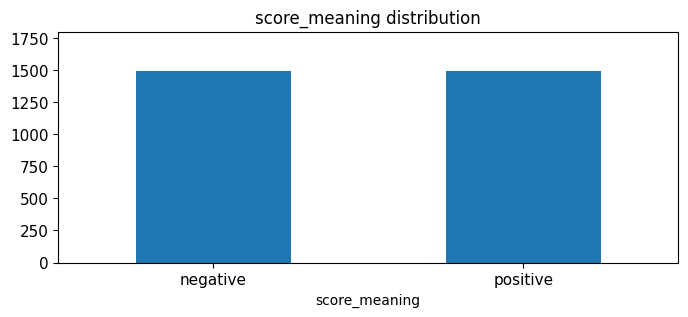

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline

print(Y.score_meaning)
print(Y.score_meaning.value_counts())


# plot barchart for X
Y.score_meaning.value_counts().plot(kind = 'bar',
                                    title = 'score_meaning distribution',
                                    ylim = [0, 1800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


<Axes: title={'center': 'score_meaning distribution'}, xlabel='score_meaning'>

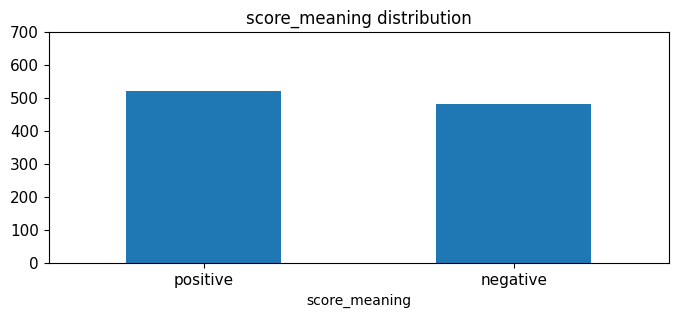

In [251]:
Y_sample.score_meaning.value_counts().plot(kind = 'bar',
                                    title = 'score_meaning distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

5.2 Feature Creation

In [252]:
import nltk
nltk.download('punkt')
# takes a like a minute or two to process
Y['unigrams'] = Y['sentence'].apply(lambda t: dmh.tokenize_text(t))
Y

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sw_ya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentence,score,score_meaning,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"
...,...,...,...,...
2978,I think food should have flavor and texture an...,0,negative,"[I, think, food, should, have, flavor, and, te..."
2979,Appetite instantly gone.,0,negative,"[Appetite, instantly, gone, .]"
2980,Overall I was not impressed and would not go b...,0,negative,"[Overall, I, was, not, impressed, and, would, ..."
2981,"The whole experience was underwhelming, and I ...",0,negative,"[The, whole, experience, was, underwhelming, ,..."


5.3 Feature subset selection

In [309]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Y_counts = count_vect.fit_transform(Y.sentence) 
Y['freq'] = Y_word_counts.toarray().tolist()
print(Y_counts)
print("y",Y_counts[0,2314])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1
  (1, 1993)	1
  (1, 713)	1
  (1, 1603)	1
  (1, 4861)	1
  (2, 1829)	1
  (2, 4531)	1
  (2, 2023)	1
  :	:
  (2982, 4545)	1
  (2982, 4609)	1
  (2982, 2432)	1
  (2982, 2314)	1
  (2982, 4531)	3
  (2982, 647)	1
  (2982, 2282)	1
  (2982, 4542)	1
  (2982, 3097)	1
  (2982, 4974)	1
  (2982, 2982)	1
  (2982, 4593)	1
  (2982, 297)	1
  (2982, 3166)	1
  (2982, 2630)	1
  (2982, 1540)	1
  (2982, 4548)	1
  (2982, 785)	1
  (2982, 4630)	1
  (2982, 588)	1
  (2982, 2068)	1
  (2982, 3857)	1
  (2982, 3437)	1
  (2982, 5110)	1
  (2982, 1387)	1
y 2


In [254]:
analyze = count_vect.build_analyzer()
analyze(Y.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [310]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:40]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(Y.index)[0:40]]
print(plot_y)
plot_z = Y_counts[0:40, 0:40].toarray() 
print(plot_z)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980', 'term_1986', 'term_1995', 'term_1998', 'term_20', 'term_2000', 'term_2005', 'term_2006', 'term_2007', 'term_20th', 'term_2160', 'term_23', 'term_24', 'term_25', 'term_2mp', 'term_30', 'term_30s', 'term_325', 'term_35', 'term_350', 'term_375']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_23,term_24,term_25,term_2mp,term_30,term_30s,term_325,term_35,term_350,term_375
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


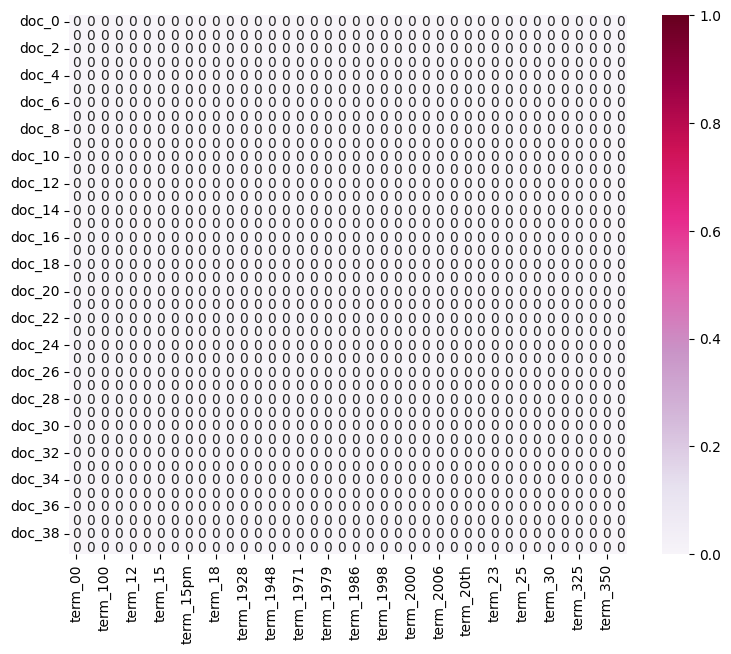

In [311]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

5.4 Dimensionality Reduction

In [257]:
from sklearn.decomposition import PCA
Y_reduced = PCA(n_components = 2).fit_transform(Y_counts.toarray())
Y_reduced.shape

(2983, 2)

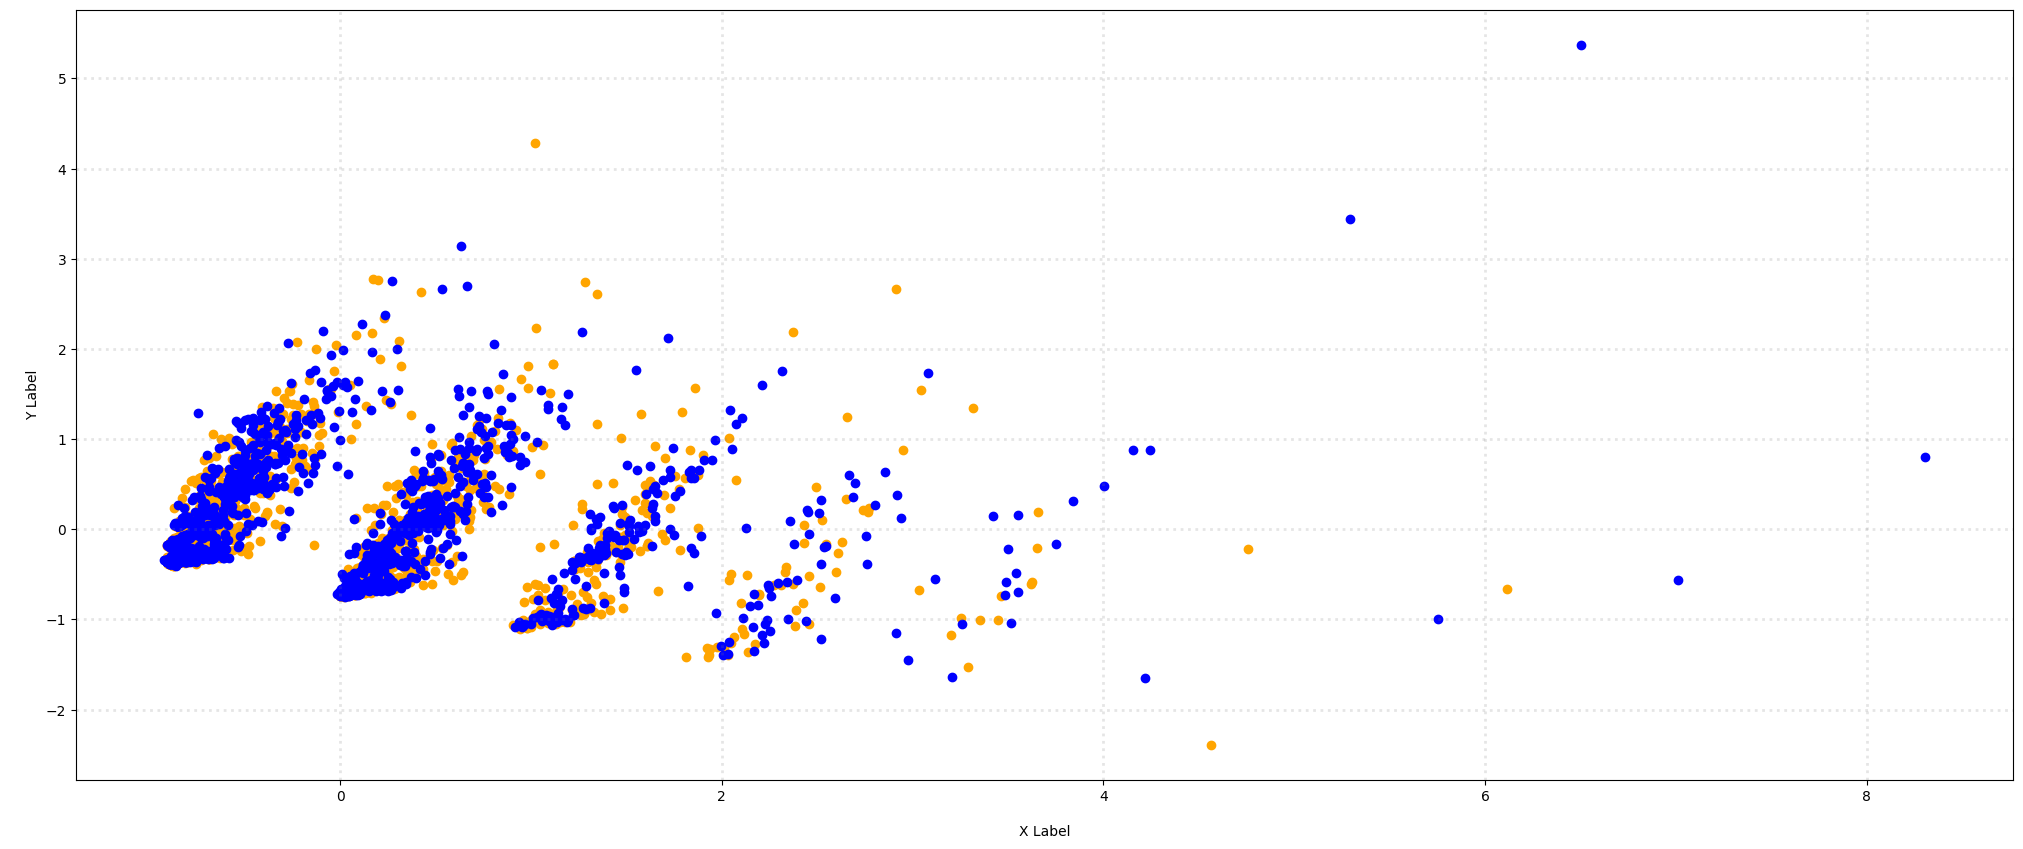

In [258]:
# Color of each category
col = ['orange', 'blue']
category_name = ['negative', 'positive']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

# Create points with different color according to category
for c, category in zip(col, category_name):
    xs = Y_reduced[Y['score_meaning'] == category].T[0]
    ys = Y_reduced[Y['score_meaning'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

# Setting scatter plot attributes
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

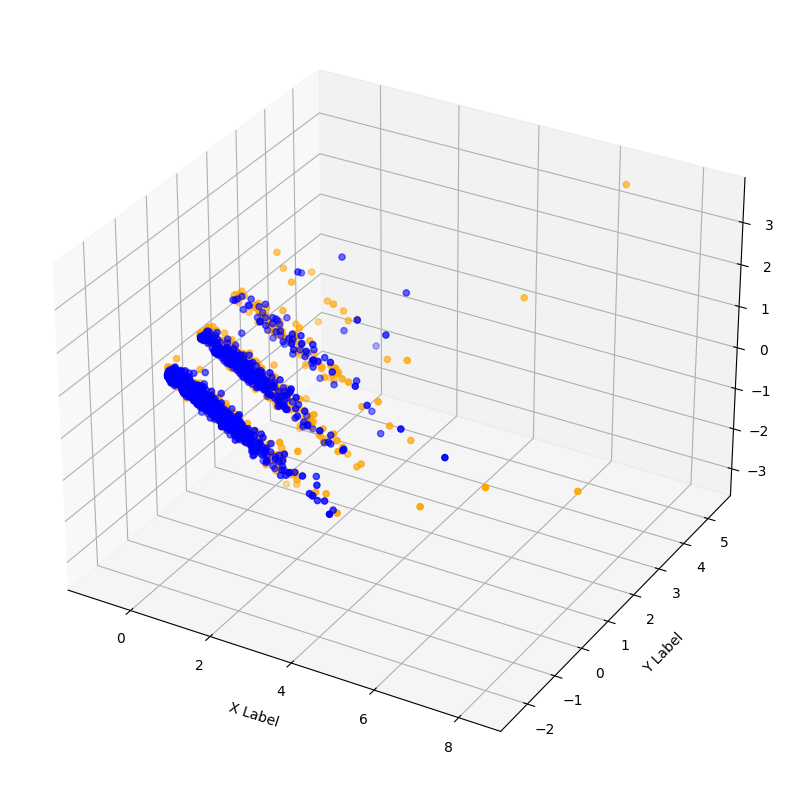

In [259]:
from sklearn.decomposition import PCA
Y_reduced = PCA(n_components = 3).fit_transform(Y_counts.toarray())
col = [ 'blue',  'orange']
category_name = ['negative', 'positive']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, category_name ):
    xs = Y_reduced[Y['score_meaning'] == category].T[0]
    ys = Y_reduced[Y['score_meaning'] == category].T[1]
    zs = Y_reduced[Y['score_meaning'] == category].T[2]

    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

5.5 Attribute Transformation / Aggregation

In [260]:
Y_term_frequencies = np.asarray(Y_counts.sum(axis=0))[0]
Y_term_frequencies

array([ 1, 36,  3, ...,  1,  2,  1], dtype=int64)

C:\Users\sw_ya\AppData\Local\Temp\ipykernel_3500\3480579971.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



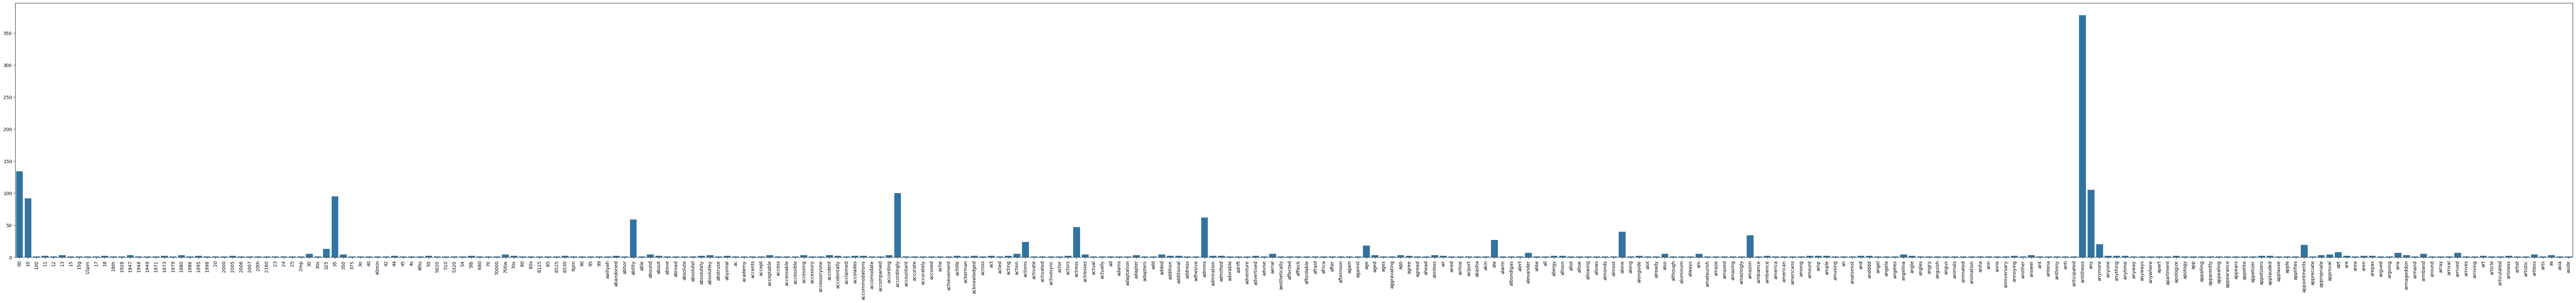

In [261]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\sw_ya\AppData\Local\Temp\ipykernel_3500\1525322602.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


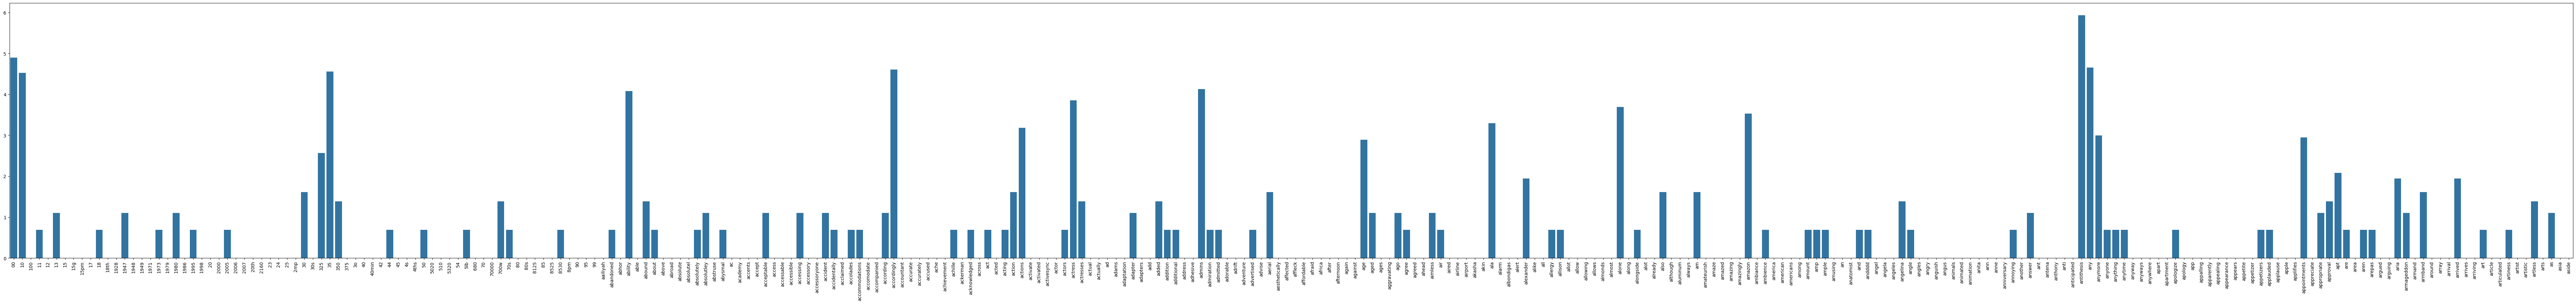

In [262]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

5.6 Discretization and Binarization

In [263]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(Y.score)

LabelBinarizer()

In [264]:
Y['bin_score'] = mlb.transform(Y['score']).tolist()
Y[0:9]

,sentence,score,score_meaning,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


### 6. Data Exploration

In [267]:
document_to_transform_1 = []
random_record_1 = Y.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Y.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Y.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [268]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [269]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [270]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\sw_ya\AppData\Local\Temp\ipykernel_3500\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\sw_ya\AppData\Local\Temp\ipykernel_3500\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\sw_ya\AppData\Local\Temp\ipykernel_3500\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\sw_ya\AppData\Local\Temp\ipykernel_3500\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

# 3. Third part

1. Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 


Draw word cloud from whole dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sw_ya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


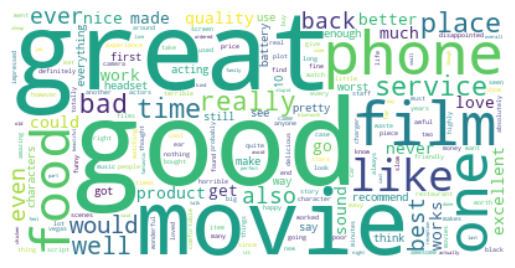

In [271]:

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

text_freq = {}
# Generate dictionary {'term': word_count }
for i in range(Y_term_frequencies.shape[0]):
    text_freq[count_vect.get_feature_names_out()[i]] = Y_term_frequencies[i]

# Flitered out stopwords that is not so contribute to classifier.
for fliter in stopwords.words('english'):
    text_freq.pop(fliter, None)    

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(text_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

2. Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .


In [275]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Get Word Frequencies
count_vect = CountVectorizer()
Y_word_counts = count_vect.fit_transform(Y.sentence)

# Get TF-IDF attributes
transformer = TfidfTransformer(smooth_idf=True)
Y_tfidf = transformer.fit_transform(Y_word_counts)
Y['tfidf'] = Y_tfidf.toarray().tolist()
print(Y_tfidf.shape)
Y

(2983, 5155)


,sentence,score,score_meaning,unigrams,bin_score,tfidf
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
2978,I think food should have flavor and texture an...,0,negative,"[I, think, food, should, have, flavor, and, te...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2979,Appetite instantly gone.,0,negative,"[Appetite, instantly, gone, .]",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2980,Overall I was not impressed and would not go b...,0,negative,"[Overall, I, was, not, impressed, and, would, ...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2981,"The whole experience was underwhelming, and I ...",0,negative,"[The, whole, experience, was, underwhelming, ,...",[0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


3. Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.

TF-IDF Naive Bayes classifier

In [324]:
# TF-IDF Naive Bayes classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
# Split training and testing dataset in 8:2
X_tfidf_train, X_tfidf_test, Y_tfidf_train, Y_tfidf_test = train_test_split(Y, Y['score'], test_size=0.2, random_state=None)

# Training TF-IDF classifier
tfidf_clf = MultinomialNB()
tfidf_clf.fit(X_tfidf_train['tfidf'].tolist(), Y_tfidf_train)

# Identify test dataset
tfidf_result = tfidf_clf.predict(X_tfidf_test['tfidf'].tolist())

# Results
print(metrics.classification_report(tfidf_result, Y_tfidf_test))
print(metrics.confusion_matrix(tfidf_result, Y_tfidf_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       302
           1       0.79      0.82      0.80       295

    accuracy                           0.80       597
   macro avg       0.80      0.80      0.80       597
weighted avg       0.80      0.80      0.80       597

[[236  66]
 [ 54 241]]


In [323]:
# Word frequency Naive Bayes classifier
X_wf_train, X_wf_test, Y_wf_train, Y_wf_test = train_test_split(Y, Y['score'], test_size=0.2, random_state=None)

# Training word frequency classifier
wf_clf = MultinomialNB()
wf_clf.fit(X_wf_train['freq'].tolist(), Y_wf_train)
wf_result = wf_clf.predict(X_wf_test['freq'].tolist())

# Results
print(metrics.classification_report(wf_result, Y_wf_test))
print(metrics.confusion_matrix(wf_result, Y_wf_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       323
           1       0.80      0.80      0.80       274

    accuracy                           0.81       597
   macro avg       0.81      0.81      0.81       597
weighted avg       0.81      0.81      0.81       597

[[267  56]
 [ 56 218]]
